In [101]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv('./data/housing.csv')

In [103]:
data.info() # Search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [104]:
data.dropna(inplace=True) # Drop null values and saves the changes in the same dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [105]:
# Now we need to split the data into training and testing data
# We need some unseen data to test the model

from sklearn.model_selection import train_test_split 

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [107]:
train_data = x_train.join(y_train) # Join the training data

In [108]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8089,-118.21,33.81,43.0,905.0,199.0,764.0,204.0,3.3214,NEAR OCEAN,162200.0
12334,-116.50,33.98,5.0,4332.0,868.0,1420.0,567.0,4.0417,INLAND,146400.0
8425,-118.34,33.92,29.0,1475.0,349.0,965.0,370.0,3.3558,<1H OCEAN,199600.0
13738,-117.21,34.05,4.0,2904.0,764.0,1250.0,664.0,3.2131,INLAND,137500.0
19291,-122.86,38.42,38.0,1166.0,223.0,584.0,225.0,3.6667,<1H OCEAN,244400.0
...,...,...,...,...,...,...,...,...,...,...
10200,-117.94,33.87,46.0,2066.0,450.0,1275.0,448.0,3.9375,<1H OCEAN,187000.0
18445,-121.81,37.25,25.0,4096.0,623.0,2128.0,618.0,6.2957,<1H OCEAN,251800.0
102,-122.25,37.81,39.0,854.0,242.0,389.0,228.0,3.1250,NEAR BAY,237500.0
2434,-119.62,36.58,13.0,1788.0,405.0,1652.0,411.0,2.6858,INLAND,62400.0


In [109]:
# we do log transformation to normalize the data and avoid skewness

train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1 # we do +1 to avoid log(0) which is undefined
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

In [110]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis= 1) # we use one hot encoding to change the ocean_proximity to numerical values

<Axes: >

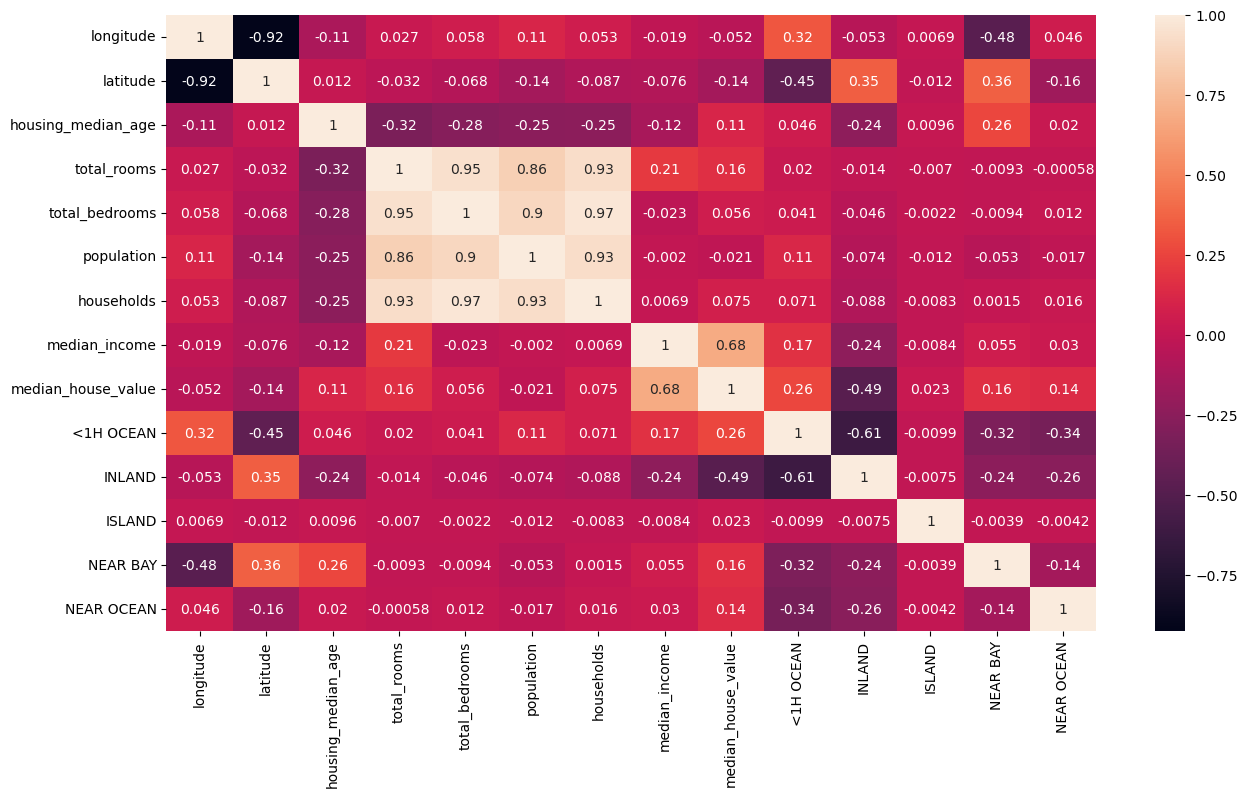

In [111]:
plt.figure(figsize=(15, 8)) # 15, 8 is the size of the plot
sns.heatmap(train_data.corr(), annot=True) # we plot the correlation matrix to see the correlation between the features

<Axes: xlabel='latitude', ylabel='longitude'>

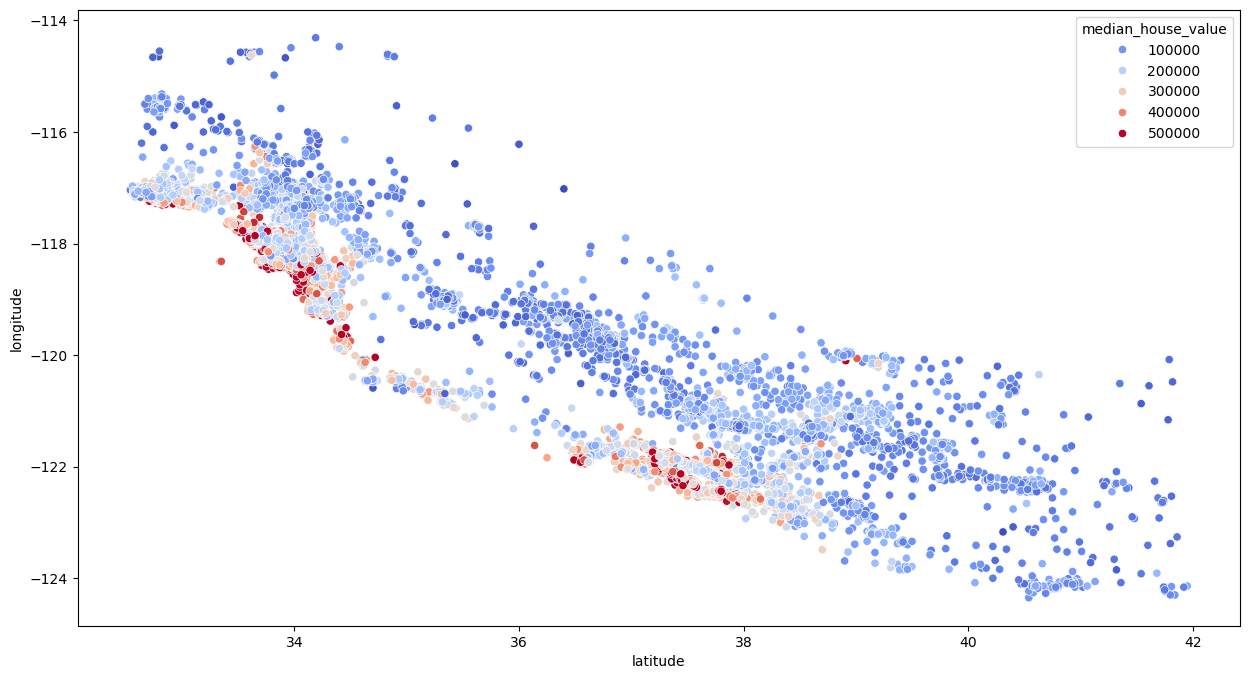

In [112]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = "median_house_value", palette="coolwarm") # we plot the scatter plot between median_income and median_house_value

In [113]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"] # create a new feature bedroom_ratio
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"] # create a new feature household_rooms

In [114]:
# Let's create a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"] # we need to do it again since we added new features

reg = LinearRegression()
reg.fit(x_train, y_train) # we didnt scale!

LinearRegression()

In [115]:
test_data = x_test.join(y_test) # Join the training data

test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) + 1
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis= 1)
test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]


In [116]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [117]:
reg.score(x_test, y_test) # R^2 score

0.6757481941747392

In [118]:
from sklearn.ensemble import RandomForestRegressor\


forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [120]:
forest.score(x_test, y_test) 
# 0.82 is better than 0.63
# this score is the R^2 score, the closer to 1 the better

0.8287617679638398

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300], # number of trees in the forest
    'max_features': [2, 4], # number of features to consider when looking for the best split
    'min_samples_split': [None, 4, 8] # minimum number of samples 
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True) # cv is the number of folds in the cross validation
grid_search.fit(x_train, y_train)

In [132]:
best_forest = grid_search.best_estimator_

In [133]:
grid_search.best_estimator_.score(x_test, y_test) 

0.8262228169630699